# IMPORT LIBS

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

In [2]:
# Loading Data From Csv to pandas dataframe
df = pd.read_csv(
    "../data/raw/mymoviedb.csv",
    engine="python",
    on_bad_lines="skip"
)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# Dataset shape
df.shape

(9837, 9)

In [4]:
# Check for null values
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [5]:
# Dropping Nan Values
df = df.dropna()

# Checking
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [6]:
# Dataset Description
df.describe()

,Popularity
count,9826.000000
mean,40.323951
std,108.879332
min,13.354000
25%,16.128250
50%,21.195000
75%,35.179250
max,5083.954000


In [7]:
# Df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 767.7+ KB


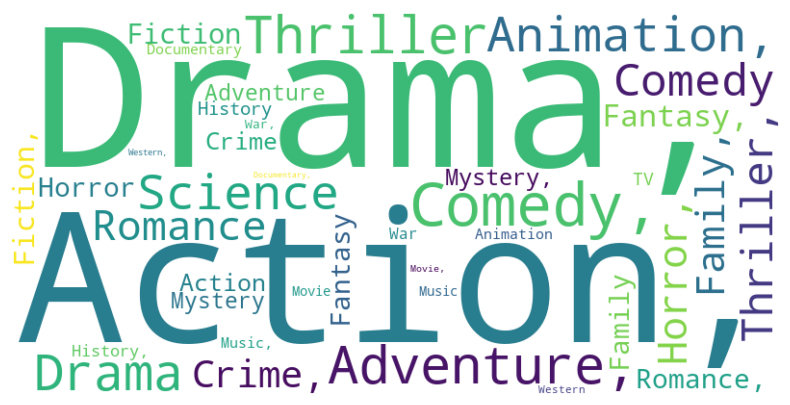

In [8]:
# Split and flatten genres
genres = df["Genre"].dropna().str.split(" ")

# Flatten list of lists
all_genres = [g for sublist in genres for g in sublist]

# Count frequencies
genre_counts = Counter(all_genres)

# Generate word cloud from frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(genre_counts)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

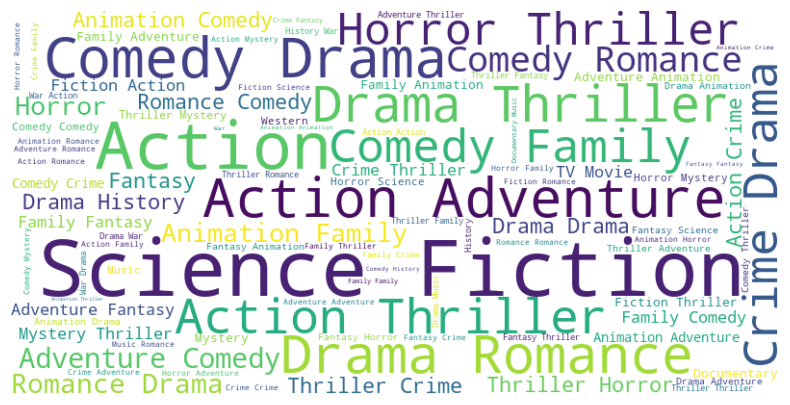

In [9]:
# Combine all genres into one string
genre_text = " ".join(df["Genre"].dropna())

# Create word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(genre_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Plots

In [10]:
# Ensure Release_Date is datetime and extract year
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
df["Year"] = df["Release_Date"].dt.year

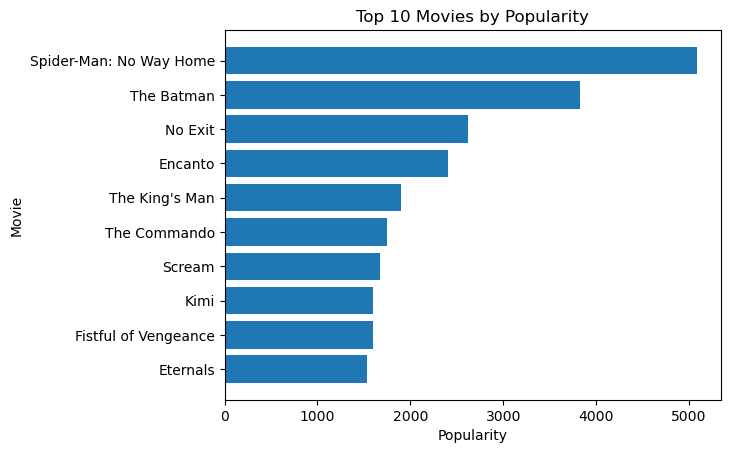

In [11]:
# ---------- 1. Top 10 Movies by Popularity ----------
top_popularity = df.sort_values("Popularity", ascending=False).head(10)

plt.figure()
plt.barh(top_popularity["Title"], top_popularity["Popularity"])
plt.title("Top 10 Movies by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

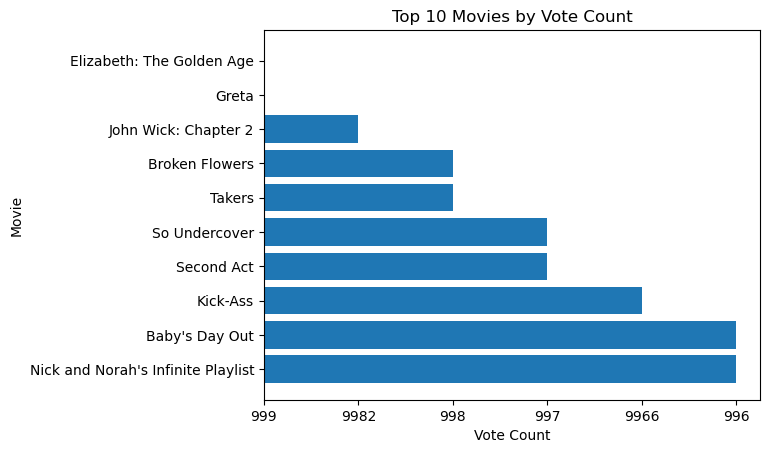

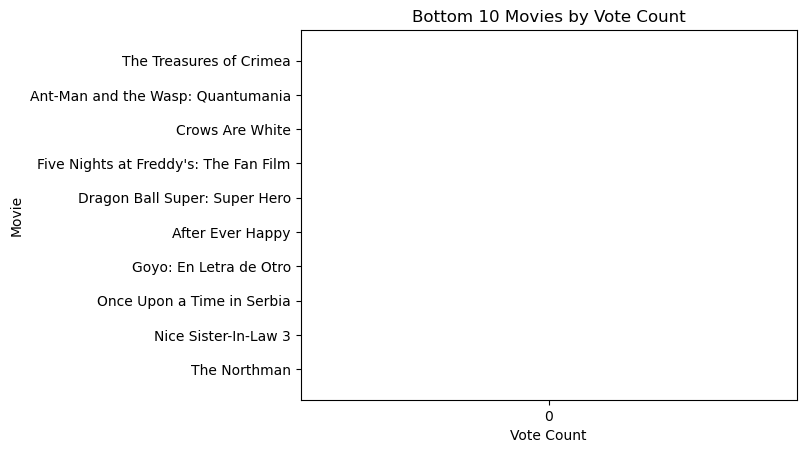

In [12]:
# ---------- 2. Top 10 and Bottom 10 by Vote Count ----------
top_votes = df.sort_values("Vote_Count", ascending=False).head(10)
low_votes = df.sort_values("Vote_Count", ascending=True).head(10)

plt.figure()
plt.barh(top_votes["Title"], top_votes["Vote_Count"])
plt.title("Top 10 Movies by Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.barh(low_votes["Title"], low_votes["Vote_Count"])
plt.title("Bottom 10 Movies by Vote Count")
plt.xlabel("Vote Count")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

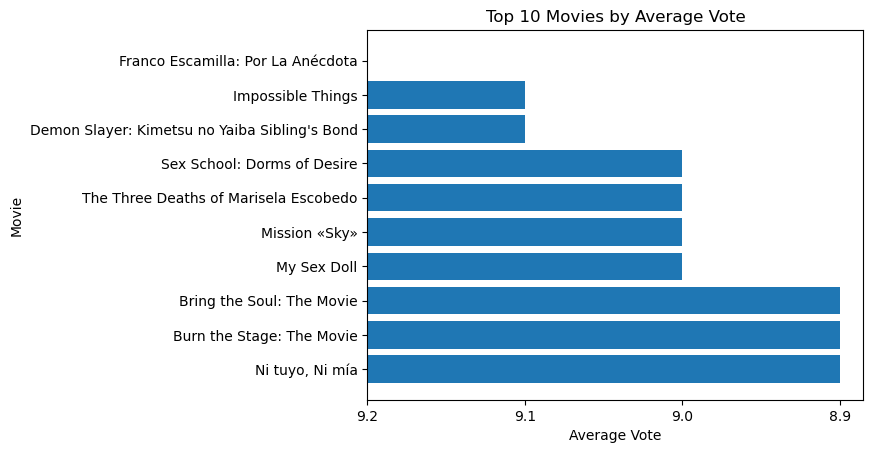

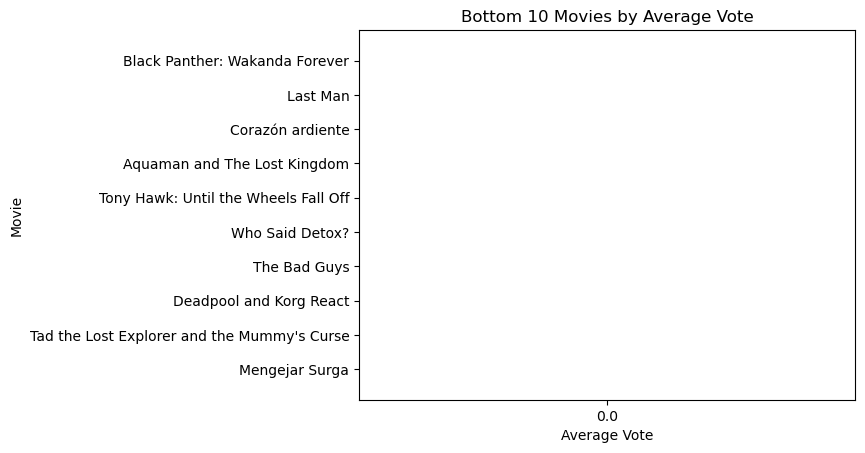

In [13]:
# ---------- 3. Top 10 and Bottom 10 by Average Vote ----------
top_avg_vote = df.sort_values("Vote_Average", ascending=False).head(10)
low_avg_vote = df.sort_values("Vote_Average", ascending=True).head(10)

plt.figure()
plt.barh(top_avg_vote["Title"], top_avg_vote["Vote_Average"])
plt.title("Top 10 Movies by Average Vote")
plt.xlabel("Average Vote")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.barh(low_avg_vote["Title"], low_avg_vote["Vote_Average"])
plt.title("Bottom 10 Movies by Average Vote")
plt.xlabel("Average Vote")
plt.ylabel("Movie")
plt.gca().invert_yaxis()
plt.show()

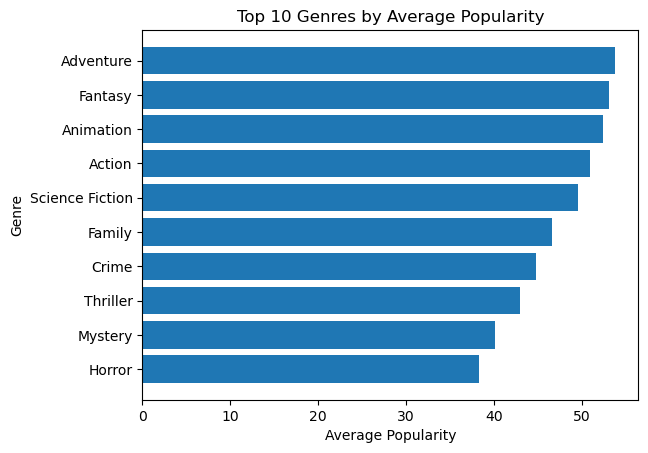

In [14]:
# ---------- 4. Popularity by Genre (Top 10 Genres) ----------
genres = df["Genre"].dropna().str.split(", ")
genre_exploded = df.assign(Genre=genres).explode("Genre")

genre_popularity = (
    genre_exploded.groupby("Genre")["Popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
plt.barh(genre_popularity.index, genre_popularity.values)
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

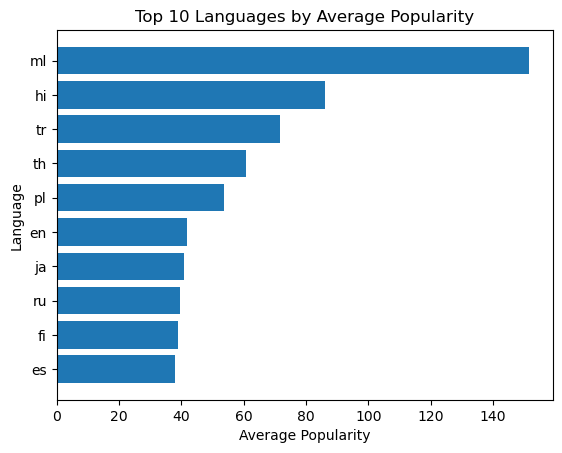

In [15]:
# ---------- 5. Popularity by Language (Top 10 Languages) ----------
language_popularity = (
    df.groupby("Original_Language")["Popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
plt.barh(language_popularity.index, language_popularity.values)
plt.title("Top 10 Languages by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Language")
plt.gca().invert_yaxis()
plt.show()

In [16]:
top_yearly = (
    df.sort_values("Popularity", ascending=False)
      .groupby("Year")
      .head(10)
)
top_yearly

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021
...,...,...,...,...,...,...,...,...,...,...
9720,1937-03-03,Lost Horizon,British diplomat Robert Conway and a small gro...,13.451,140,7.1,en,"Adventure, Fantasy, Drama, Mystery",https://image.tmdb.org/t/p/original/aoXlp2ywUZ...,1937
9746,1952-09-03,Monkey Business,Research chemist Barnaby Fulton works on a fou...,13.426,176,6.7,en,"Comedy, Romance",https://image.tmdb.org/t/p/original/eS413WzslM...,1952
9783,1950-08-26,Rashomon,Brimming with action while incisively examinin...,13.393,1576,8.2,ja,"Crime, Drama, Mystery",https://image.tmdb.org/t/p/original/cEg6qpVbKA...,1950
9786,1935-12-26,Captain Blood,"Dr. Peter Blood, unjustly convicted of treason...",13.391,159,7.3,en,"Adventure, Action, History, Romance",https://image.tmdb.org/t/p/original/iuYA1w7iIk...,1935


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   object        
 5   Vote_Average       9826 non-null   object        
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
 9   Year               9826 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 806.0+ KB


In [18]:
# Converting Vote Count and Vote Average To 
df["Vote_Count"] = df["Vote_Count"].astype(float)
df["Vote_Average"] = df["Vote_Average"].astype(float)

In [19]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average,Year
count,9826,9826.000000,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467,2006.202931
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000,1902.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000,2000.000000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000,2011.000000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000,2017.000000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000,2024.000000
std,NaN,108.879332,2611.303856,1.129797,15.686202


## Statistical Inference and Distribution Analysis

This section interprets the **min, max, mean, and standard deviation** of the dataset and explains how these statistics affect the **data distribution** and downstream analysis.

---

### Release Date / Year

- **Mean Year:** ~2006  
- **Median Year:** 2011  
- **Min – Max:** 1902 – 2024  
- **Standard Deviation:** ~15.7 years  

The mean year is noticeably lower than the median, indicating a **right-skew toward recent movies**. A small number of very old films pull the mean backward, while most movies are concentrated in modern years (2000–2017).

**Distribution impact:**  
The distribution is **non-uniform**, dense in recent years and sparse in early cinema.

**Modeling implication:**  
Time-based features should be normalized. Older movies may behave differently in popularity and voting patterns.

---

### Popularity

- **Mean:** 40.32  
- **Median:** 21.20  
- **Max:** 5083.95  
- **Standard Deviation:** 108.88  

The maximum popularity is extremely high compared to the mean and 75th percentile. The standard deviation is almost **3× the mean**, which strongly indicates **extreme right skew and outliers**.

**Distribution impact:**  
Popularity follows a **long-tail distribution**, where a few movies dominate attention while most have low visibility.

**Modeling implication:**  
Apply **log transformation** or cap extreme values before modeling or similarity calculations.

---

### Vote Count

- **Mean:** 1392.94  
- **Median:** 444  
- **Max:** 31,077  
- **Standard Deviation:** 2611.30  

The mean is much higher than the median, and the standard deviation exceeds the mean. This confirms **high dispersion and right skew**, driven by a small number of very popular movies.

**Distribution impact:**  
Vote count is heavily skewed, with most movies receiving few votes.

**Modeling implication:**  
Use `log(Vote_Count + 1)` or apply minimum vote thresholds to reduce noise and bias.

---

### Vote Average (Rating)

- **Mean:** 6.44  
- **Median:** 6.5  
- **Min – Max:** 0 – 10  
- **Standard Deviation:** 1.13  

The mean and median are close, indicating a **stable central tendency**. The relatively small standard deviation shows ratings are tightly clustered around the mean.

**Distribution impact:**  
Ratings are **compressed** and only mildly skewed, making them weak discriminators on their own.

**Modeling implication:**  
Ratings should be combined with vote count (e.g., weighted ratings) for meaningful ranking.

---

### Overall Distribution Summary

- **Popularity and Vote_Count:** Highly skewed with extreme outliers  
- **Vote_Average:** Narrow distribution, low variance  
- **Year:** Recent-heavy, not evenly distributed  

---

### Practical Recommendations

- Apply **log scaling** to Popularity and Vote_Count  
- Filter or weight ratings using minimum Vote


# Filtering Base on Genere and Movie Description 

In [20]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [21]:
# Taking Movie Overview and Genre columns
selected_features = ["Overview", "Genre"]
print(f"selected_features {selected_features}")
print(f"Normal Features {df.columns}")

selected_features ['Overview', 'Genre']
Normal Features Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url', 'Year'],
      dtype='object')


In [22]:
# Checking for null values
print(df[selected_features].isnull().sum())
print(df.shape)

Overview    0
Genre       0
dtype: int64
(9826, 10)


In [23]:
# Creating a column where Genre and Movie Overview are combined
combined_movies = df[selected_features]
df["combined_features"] = combined_movies.apply(
    lambda row: " ".join(row.values.astype(str)),
    axis=1
)

combined_movies

,Overview,Genre
0,Peter Parker is unmasked and no longer able to...,"Action, Adventure, Science Fiction"
1,"In his second year of fighting crime, Batman u...","Crime, Mystery, Thriller"
2,Stranded at a rest stop in the mountains durin...,Thriller
3,"The tale of an extraordinary family, the Madri...","Animation, Comedy, Family, Fantasy"
4,As a collection of history's worst tyrants and...,"Action, Adventure, Thriller, War"
...,...,...
9832,A dramatization of the Starkweather-Fugate kil...,"Drama, Crime"
9833,A female vampire falls in love with a man she ...,Horror
9834,When young and successful reporter Jamie finds...,"Mystery, Thriller, Horror"
9835,Billie Holiday spent much of her career being ...,"Music, Drama, History"


In [24]:
# Converting Text to lower case
df["combined_features"] = df["combined_features"].str.lower()
df["combined_features"]

0       peter parker is unmasked and no longer able to...
1       in his second year of fighting crime, batman u...
2       stranded at a rest stop in the mountains durin...
3       the tale of an extraordinary family, the madri...
4       as a collection of history's worst tyrants and...
                              ...                        
9832    a dramatization of the starkweather-fugate kil...
9833    a female vampire falls in love with a man she ...
9834    when young and successful reporter jamie finds...
9835    billie holiday spent much of her career being ...
9836    documentary style account of a nuclear holocau...
Name: combined_features, Length: 9826, dtype: object

In [25]:
# Clean and tokenize the text
df["combined_text"] = (
    df["combined_features"]
    .str.lower()
    .str.replace(",", " ", regex=False)
)

In [26]:
# Compute word count (overall)
from collections import Counter

# Split text into words
all_words = " ".join(df["combined_text"]).split()

# Count words
word_counts = Counter(all_words)

# Convert to DataFrame (optional, but useful)
word_count_df = (
    pd.DataFrame(word_counts.items(), columns=["word", "count"])
    .sort_values("count", ascending=False)
)

word_count_df.head(20)


,word,count
14,the,26997
18,a,20432
8,to,15915
4,and,14031
16,of,13165
45,in,8384
10,his,7132
2,is,6238
118,with,4700
89,her,4450


### Observations on Word Counts

From the initial word frequency table, we can see that the most common words are **function words** that naturally appear in sentences, such as:

- `the`, `a`, `to`, `and`, `of`, `in`, `is`, `for`, `on`, `with`, `as`, `when`, `he`, `her`

These words dominate the counts but **carry little semantic meaning** about the content of the movies.  

To extract **true insights from the text**, we can:

1. **Remove common English stopwords** using libraries like **scikit-learn’s `ENGLISH_STOP_WORDS`**.  
2. Focus on meaningful words that describe movie plots and themes.  
3. Optionally, also remove genre words (`Action`, `Drama`, `Comedy`, etc.) if we want the analysis to highlight unique descriptive content rather than repeated labels.

After removing stopwords, the word counts will reflect **keywords and themes** in the dataset, which are more informative for:

- Visualizations like word clouds  
- Building content-based recommendation features  
- Understanding the most common plot elements across movies  

This preprocessing step is essential for deriving **actionable insights** from text data rather than being misled by frequently occurring function words.


In [42]:
# Removing Stop Words 


# Use scikit-learn stopwords
stop_words = ENGLISH_STOP_WORDS

# Function to clean text
def remove_stopwords(text):
    words = text.lower().replace(",", " ").split()  # lowercase, replace commas
    filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return " ".join(filtered)

# Apply to combined_text
df["clean_text"] = df["combined_text"].fillna("").apply(remove_stopwords)

# Count words across all movies
all_words = " ".join(df["clean_text"]).split()
word_counts = Counter(all_words)

# Convert to DataFrame
word_count_df = (
    pd.DataFrame(word_counts.items(), columns=["word", "count"])
    .sort_values("count", ascending=False)
)

# Show top 20 words
word_count_df.head(20)

,word,count
252,drama,3793
89,comedy,3084
18,action,2779
38,thriller,2521
32,family,2192
19,adventure,2044
523,romance,1575
151,horror,1529
88,animation,1450
25,crime,1423


### Insights from Word Counts After Stopword Removal

After removing common English stopwords, the top words now reflect **meaningful content and themes** from movie overviews and genres. Key observations:

1. **Genres dominate the top words**:  
   - `drama`, `comedy`, `action`, `thriller`, `family`, `adventure`, `romance`, `horror`, `animation`, `crime`, `fantasy`, `science`, `fiction`, `war`  
   These indicate that genre labels are still highly frequent in the combined text, which is expected since each movie lists multiple genres.

2. **Plot descriptors appear**:  
   - Words like `young`, `life`, `world`, `man`, `new`, and `mystery` capture recurring themes in movie plots.  
   - For example, `young` often reflects coming-of-age or youth-focused stories; `life` and `world` indicate broader narrative scopes.

3. **Frequency highlights trends**:  
   - `drama` (3,793 occurrences) is the most common theme, showing that dramatic elements are dominant in the dataset.  
   - `comedy` (3,084) and `action` (2,779) also rank highly, reflecting the popularity of these genres.  

4. **Insights for recommendation systems**:  
   - Using this cleaned text for **TF-IDF or word embeddings** will emphasize meaningful features rather than grammatical noise.  
   - Removing stopwords uncovers **keywords that truly differentiate movies**, which improves content-based similarity calculations.

**Conclusion:**  
Stopword removal shifts the focus from common grammatical words to **keywords that describe genres, plot elements, and themes**, providing actionable information for:

- Content-based recommendation systems  
- Word cloud visualizations  
- Understanding dominant movie trends in the dataset


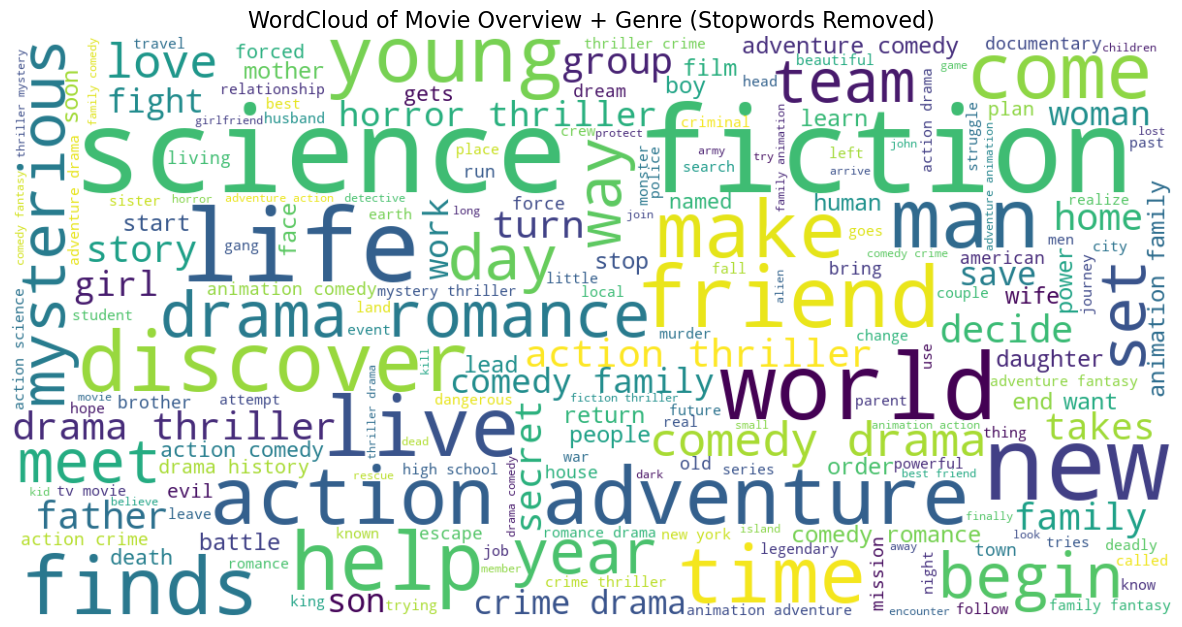

In [43]:
# Combine all cleaned text into one large string
text = " ".join(df["clean_text"])

# Create the WordCloud object
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis"
).generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Movie Overview + Genre (Stopwords Removed)", fontsize=16)
plt.show()

In [44]:
# Total word count
total_word_count = len(all_words)
print(f"Total word count: {total_word_count}")

Total word count: 245861


In [45]:
# Vector Class Instance
vectorizer = TfidfVectorizer()

In [48]:
df["clean_text"]

0       peter parker unmasked longer able separate nor...
1       second year fighting crime batman uncovers cor...
2       stranded rest stop mountains blizzard recoveri...
3       tale extraordinary family madrigals live hidde...
4       collection worst tyrants criminal masterminds ...
                              ...                        
9832    dramatization killing spree teenage girl boyfr...
9833    female vampire falls love man met male vampire...
9834    young successful reporter jamie finds sister d...
9835    billie holiday spent career adored government ...
9836    documentary style account nuclear holocaust ef...
Name: clean_text, Length: 9826, dtype: object

In [51]:
df["clean_text"].shape

(9826,)

In [52]:
feature_vectors = vectorizer.fit_transform(df["clean_text"])
feature_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 232820 stored elements and shape (9826, 25777)>

In [53]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 232820 stored elements and shape (9826, 25777)>
  Coords	Values
  (0, 16912)	0.2257231552352561
  (0, 16577)	0.26442197752796665
  (0, 24118)	0.3428058643909984
  (0, 13427)	0.25019999160766193
  (0, 40)	0.21177543099460133
  (0, 20325)	0.2560106524054059
  (0, 15739)	0.23600878942252743
  (0, 13205)	0.1233824251994861
  (0, 1243)	0.23675524315371557
  (0, 10265)	0.14609419322307618
  (0, 6409)	0.21857034305232342
  (0, 21939)	0.19314697476735598
  (0, 21672)	0.2677018436809926
  (0, 5365)	0.17923103665780166
  (0, 8598)	0.2572885606022774
  (0, 6193)	0.16859237364534563
  (0, 23665)	0.25241796552244483
  (0, 14325)	0.22301013708174164
  (0, 185)	0.08607201662651146
  (0, 308)	0.0990665976957734
  (0, 20034)	0.11423341153159715
  (0, 8232)	0.11443851329789194
  (1, 20173)	0.25058189544028175
  (1, 25527)	0.21003419784892102
  (1, 8254)	0.24104549429048716
  :	:
  (9824, 6700)	0.20088023332703714
  (9824, 283)	0.2850594676359

# Cosine Similarity 

In [54]:
similarity = cosine_similarity(feature_vectors)

In [55]:
print(similarity)

[[1.         0.         0.         ... 0.         0.         0.02428384]
 [0.         1.         0.00878405 ... 0.02414064 0.         0.02978842]
 [0.         0.00878405 1.         ... 0.02828137 0.02255759 0.        ]
 ...
 [0.         0.02414064 0.02828137 ... 1.         0.         0.        ]
 [0.         0.         0.02255759 ... 0.         1.         0.03713568]
 [0.02428384 0.02978842 0.         ... 0.         0.03713568 1.        ]]


In [56]:
print(similarity.shape)

(9826, 9826)


# Predicting Movies

In [72]:
import difflib

# -----------------------------
# 1. Get the movie name from the user
# -----------------------------
movie_name = input("Enter Movie Name: ")

# -----------------------------
# 2. Convert the DataFrame column 'Title' to a list
# -----------------------------
list_of_all_movies = df["Title"].tolist()

# -----------------------------
# 3. Find the closest match to the user input
#    get_close_matches returns a list of similar strings
# -----------------------------
find_close_match = difflib.get_close_matches(movie_name, list_of_all_movies, n=1, cutoff=0.6)

# Handle the case where no close match is found
if not find_close_match:
    print("No similar movie found. Try again.")
    exit()

# Take the first close match
close_match = find_close_match[0]

# -----------------------------
# 4. Get the index of the matched movie in the DataFrame
# -----------------------------
index_of_the_movie = df[df["Title"] == close_match].index.values[0]

# -----------------------------
# 5. Get the similarity scores for all movies with respect to the selected movie
#    'similarity' is assumed to be a precomputed similarity matrix (e.g., cosine similarity)
# -----------------------------
similarity_score = list(enumerate(similarity[index_of_the_movie]))

# -----------------------------
# 6. Sort all movies based on their similarity score in descending order
# -----------------------------
sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

# -----------------------------
# 7. Print top N similar movies (excluding the first one, which is itself)
# -----------------------------
print("Movies Recommended For You:")

for i, movie in enumerate(sorted_similar_movies[:30], start=1):
    index = movie[0]
    title_from_index = df.loc[index, "Title"]
    print(f"{i}. {title_from_index}")


Enter Movie Name:  Merlin


Movies Recommended For You:
1. Metropolis
2. Flatliners
3. Fireproof
4. Halloween Kills
5. The Craft
6. Messi
7. Ri¢hie Ri¢h
8. Independence Daysaster
9. Mine
10. Atomic Blonde
11. BloodRayne
12. Master and Commander: The Far Side of the World
13. Stranger by the Lake
14. Zero Dark Thirty
15. Wild Indian
16. Antz
17. HOUBA! On the Trail of the Marsupilami
18. Shrek Forever After
19. I Still Believe
20. Steel Magnolias
21. Spycies
22. An Officer and a Gentleman
23. Juice
24. Killers
25. The Wolf's Call
26. Nobody Sleeps in the Woods Tonight 2
27. Batman: Mask of the Phantasm
28. Lion
29. Chocolat
30. Killing Season
